# What makes a good movie?

Our stakeholder **Microsoft** has asked us to explore what different types of films are currently doing best at the box office so that they can make better decisions on what types of films to create.

## Abstract

Stakeholders looking to create profitable movie titles could use this paper to identify what movie genres provide the highest return on investment, what is optimal film reach, and which directors (if any) are most likely to provide a healthy return on investment. We address what addtributes successful movie titles have had over the last decade by applying a qualitative analysis to data gathered from IMDb's public database available for download at `https://datasets.imdbws.com`

IMDb is an online database of  information related to films, television programs, home videos, video games, and streaming content onlineand is now owned and operated by Amazon.com so the accuracy of this data can be trusted with a high degree of certainty.

The scope of this our analysis is limited to two axes of examination, profits revenues and roi as they relate to movie genres, both foreign and domestic, and profits revenues and roi as they relate to director.

### How did we process our data?

We decided to use data cleaning note book separately of this paper to reduce pysical ram requirements and to streamline this paper. For a step by step run down on the processing of the data.



## Importing the Data

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns
from scipy import stats
%matplotlib inline

In [13]:
#this feature reads the cleaned data file contained in the Data directory
df = pd.read_csv('final-data.csv')
df.drop('Unnamed: 0',axis=1,inplace=True)

#doing this here and not during data cleaning because this split doesnt survive being saved as .csv
df['genres'] = df['genres'].map(lambda x: x.split(","))
df['director'] = df['director'].map(lambda x: x.split(","))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1311 entries, 0 to 1310
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   release_date       1311 non-null   object 
 1   movie              1311 non-null   object 
 2   production_budget  1311 non-null   int64  
 3   domestic_gross     1311 non-null   int64  
 4   worldwide_gross    1311 non-null   int64  
 5   foreign_gross      1311 non-null   int64  
 6   profit             1311 non-null   int64  
 7   release_year       1311 non-null   int64  
 8   genres             1311 non-null   object 
 9   director           1311 non-null   object 
 10  roi_domestic       1311 non-null   float64
 11  roi_foreign        1311 non-null   float64
 12  roi_worldwide      1311 non-null   float64
dtypes: float64(3), int64(6), object(4)
memory usage: 133.3+ KB


## Data Understanding

All features in this analysis use the same dataset provided by our `Data/data-clean.ipynb` file which processes the raw data from zip format into a more readily usable csv file.

Each of our 1311 recrods contains information about the movie's year of release, production budget, gross revenues both foreign and domestic, profit, ROI, and director.

In [14]:
df[['production_budget','worldwide_gross','profit','roi_worldwide']].describe()

,production_budget,worldwide_gross,profit,roi_worldwide
count,1.311000e+03,1.311000e+03,1.311000e+03,1311.000000
mean,4.535077e+07,1.443545e+08,9.900370e+07,270.736950
std,5.700625e+07,2.399941e+08,1.985670e+08,1267.217927
min,1.500000e+04,0.000000e+00,-2.002376e+08,-100.000000
25%,8.000000e+06,7.631223e+06,-9.080450e+05,-33.866839
50%,2.500000e+07,5.180076e+07,2.295647e+07,111.524436
75%,5.800000e+07,1.607652e+08,1.083781e+08,303.565585
max,4.106000e+08,2.048134e+09,1.748134e+09,41556.474000


### Business Question 1: Which genres of movies can expect a higher Return on Investment?

Based on our business problem, we decided to first examine which genres these new films should be. We chose to do this by calculating the average return on investment for each genre and pulled the top 5 genres.

>We've chosen to use median because the data contains many outliers which would make the mean a non-optimal measure of central tendency. We'll be choosing the top 5 genres based on their worlwide ROI, since this is a better indication of each films total ROI.

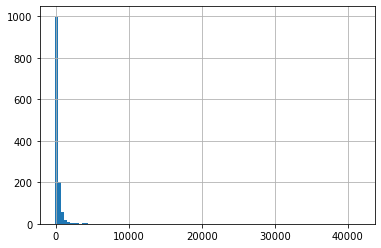

In [15]:
df['roi_worldwide'].hist(bins=100);

###### Now with that said, we examine the median ROI for each genre. 


In [16]:
#the genres for each movie are in a list. I need to seperate the genres so i can perform further analysis
genres_exp = df.explode('genres')
unique_genres = list(genres_exp['genres'].unique())

#We create a new dataframe that displays median by genre in descending order
genres_gb = genres_exp.groupby('genres').median().sort_values(by=['roi_worldwide'], ascending = False)

#take the top five and roi_worldwide
top_5_genres_roi = genres_gb[['roi_worldwide']].head(5)
top_5_genres_roi

,roi_worldwide
genres,
Mystery,227.818077
Animation,198.188978
Musical,173.752303
Sci-Fi,168.386218
Adventure,162.363957


> ##### Great, let's see the  median worldwide roi's visually

In [49]:
#creating an individual dataframe for each genre in my genres_gb dataframe
genres=genres_exp['genres'].unique().tolist()
# musical = genres_exp.loc[genres_exp.genres=='Musical']
mystery = genres_exp.loc[genres_exp.genres=='Mystery']
mystery.shape

# scifi = genres_exp.loc[genres_exp.genres=='Sci-Fi']
# adventure = genres_exp.loc[genres_exp.genres=='Adventure']
# animation = genres_exp.loc[genres_exp.genres=='Animation']

# #create a new dataframe with the top five average roi worldwide
# top_5_ww = adventure.append(animation)
# top_5_ww = top_5_ww.append(musical)
# top_5_ww = top_5_ww.append(mystery)
# top_5_ww = top_5_ww.append(scifi)

# #create a box plot with all 5 top genres comparing median and mean
# fig_dims = (15, 10)
# fig, ax = plt.subplots(figsize=fig_dims)
# sns.boxplot( x=top_5_ww['genres'], 
#             y=top_5_ww['roi_worldwide'], 
#             palette='Blues', 
#             width=0.6, 
#             showfliers = False, 
#             showmeans=True);


# plt.ylabel('% ROI', size=14)
# plt.xlabel('Movie Genres', size=14)
# plt.title('Average Worldwide ROI For The Top 5 Genres', size=18)
# ax.yaxis.grid(False) # Hide the horizontal gridlines
# ax.xaxis.grid(False) # Hide the vertical gridlines

# sns.despine(offset=10, trim=True)
# plt.show()

(115, 13)

### Editors Note ^ we need a legend to correctly identify what the triangle represents

In [18]:
#let's predict worst, base, and best case scenarios for each genre
arr = adventure['roi_worldwide']
arr2 = animation['roi_worldwide']
arr3 = musical['roi_worldwide']
arr4 = mystery['roi_worldwide']
arr5 = scifi['roi_worldwide']
print(f'Adventure ROI: \n  Worst Case = {int(np.percentile(arr, 25))}% \n  Base Case = {int(np.percentile(arr, 50))}% \n  Best Case = {int(np.percentile(arr, 75))}%')
print(f'Animation ROI: \n  Worst Case = {int(np.percentile(arr2, 25))}% \n  Base Case = {int(np.percentile(arr2, 50))}% \n  Best Case = {int(np.percentile(arr2, 75))}%')
print(f'Musical ROI: \n  Worst Case = {int(np.percentile(arr3, 25))}% \n  Base Case = {int(np.percentile(arr3, 50))}% \n  Best Case = {int(np.percentile(arr3, 75))}%')
print(f'Mystery ROI: \n  Worst Case = {int(np.percentile(arr4, 25))}% \n  Base Case = {int(np.percentile(arr4, 50))}% \n  Best Case = {int(np.percentile(arr4, 75))}%')
print(f'Sci-fi ROI: \n  Worst Case = {int(np.percentile(arr5, 25))}% \n  Base Case = {int(np.percentile(arr5, 50))}% \n  Best Case = {int(np.percentile(arr5, 75))}%')

Adventure ROI: 
  Worst Case = 41% 
  Base Case = 162% 
  Best Case = 305%
Animation ROI: 
  Worst Case = 78% 
  Base Case = 198% 
  Best Case = 335%
Musical ROI: 
  Worst Case = -78% 
  Base Case = 173% 
  Best Case = 474%
Mystery ROI: 
  Worst Case = -13% 
  Base Case = 227% 
  Best Case = 613%
Sci-fi ROI: 
  Worst Case = 5% 
  Base Case = 168% 
  Best Case = 420%


In [19]:
#creating a boxplot with the median and IDR for each genre
#fig_dims = (20, 14)
#fig, ax = plt.subplots(figsize=fig_dims)
#sns.boxplot( y=genres_exp["genres"], 
 #           x=genres_exp["roi_worldwide"], 
  #          palette="Blues", 
   #         width=0.6, 
            #removing outliers
    #        showfliers = False,
            #adding a green dot that shows mean for each genre
     #       showmeans = True);

#creating labels for my boxplot
#plt.xlabel("% ROI", size=14)
#plt.ylabel("Movie Genres", size=14)
#plt.title("Average Worldwide ROI By Genre", size=18)
#plt.show()

We next decided to take a look at how each genre performed domestically, to see if it was necessary to release films in foreign countries. We were also curious to know if the top 5 genres in the USA were different than the top 5 genres worldwide

In [20]:
#fig_dims = (20, 14)
#fig, ax = plt.subplots(figsize=fig_dims)
#sns.boxplot( y=genres_exp["genres"], 
#            x=genres_exp["roi_domestic"], 
#            palette="Blues", 
#            width=0.6, 
#            showfliers = False, 
#            showmeans=True);

#plt.xlabel("% ROI", size=14)
#plt.ylabel("Movie Genres", size=14)
#plt.title("Average Domestic ROI By Genre", size=18)
#plt.show()

In [21]:
genres_gb_dom = genres_exp.groupby('genres').median()
genres_gb_dom = genres_gb.sort_values(by=['roi_domestic'], ascending = False)
genres_gb_dom[['roi_domestic']].head(5)

,roi_domestic
genres,
Mystery,56.965319
Music,20.438264
Comedy,11.473743
Romance,10.848518
Animation,5.784405


>It looks like our top 5 genres in the USA are different from our top 5 genres in the world. Only two genres (mystery and animation) are in the top 5 for domestic and worlwide ROI. 

We next wanted to see the worst, base, and best case ROI for the top 5 genres in the USA

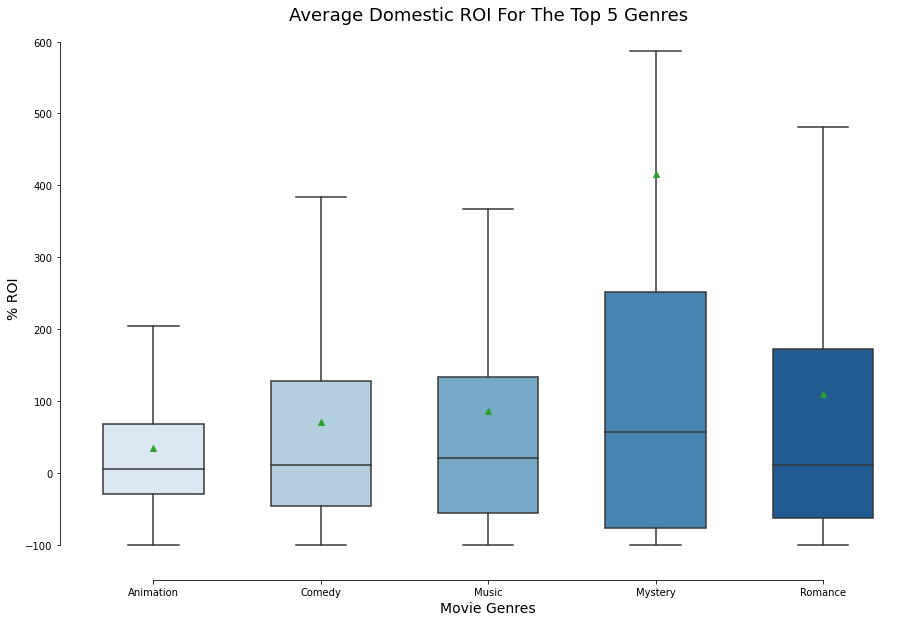

In [30]:
comedy = genres_exp.loc[genres_exp.genres=='Comedy']
music = genres_exp.loc[genres_exp.genres=='Music']
romance = genres_exp.loc[genres_exp.genres=='Romance']

top_5_df_domestic= animation.append(comedy)
top_5_df_domestic = top_5_df_domestic.append(music)
top_5_df_domestic = top_5_df_domestic.append(mystery)
top_5_df_domestic = top_5_df_domestic.append(romance)

#created a box plot with top 5 genres in roi_domestic based on median
fig_dims = (15, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot( x=top_5_df_domestic['genres'], 
            y=top_5_df_domestic['roi_domestic'], 
            palette='Blues', 
            width=0.6, 
            showfliers = False, 
            showmeans=True,
            data=top_5_df_domestic.groupby('roi_domestic', as_index=False).median());

plt.ylabel('% ROI', size=14)
plt.xlabel('Movie Genres', size=14)
plt.title('Average Domestic ROI For The Top 5 Genres', size=18)
#sns.stripplot(x="genres", y="roi_domestic", data=top_5_df_domestic)
ax.yaxis.grid(False) # Hide the horizontal gridlines
ax.xaxis.grid(False) # Show the vertical gridlines
sns.despine(offset=10, trim=True)
plt.show()

In [31]:
#let's predict worst, base, and best case scenarios for each genre
arr = animation['roi_domestic']
arr2 = comedy['roi_domestic']
arr3 = music['roi_domestic']
arr4 = mystery['roi_domestic']
arr5 = romance['roi_domestic']
print(f'Animation ROI: \n  Worst Case = {int(np.percentile(arr, 25))}% \n  Base Case = {int(np.percentile(arr, 50))}% \n  Best Case = {int(np.percentile(arr, 75))}%')
print(f'Comedy ROI: \n  Worst Case = {int(np.percentile(arr2, 25))}% \n  Base Case = {int(np.percentile(arr2, 50))}% \n  Best Case = {int(np.percentile(arr2, 75))}%')
print(f'Music ROI: \n  Worst Case = {int(np.percentile(arr3, 25))}% \n  Base Case = {int(np.percentile(arr3, 50))}% \n  Best Case = {int(np.percentile(arr3, 75))}%')
print(f'Mystery ROI: \n  Worst Case = {int(np.percentile(arr4, 25))}% \n  Base Case = {int(np.percentile(arr4, 50))}% \n  Best Case = {int(np.percentile(arr4, 75))}%')
print(f'Romance ROI: \n  Worst Case = {int(np.percentile(arr5, 25))}% \n  Base Case = {int(np.percentile(arr5, 50))}% \n  Best Case = {int(np.percentile(arr5, 75))}%')

Animation ROI: 
  Worst Case = -28% 
  Base Case = 5% 
  Best Case = 68%
Comedy ROI: 
  Worst Case = -45% 
  Base Case = 11% 
  Best Case = 127%
Music ROI: 
  Worst Case = -55% 
  Base Case = 20% 
  Best Case = 133%
Mystery ROI: 
  Worst Case = -76% 
  Base Case = 56% 
  Best Case = 252%
Romance ROI: 
  Worst Case = -61% 
  Base Case = 10% 
  Best Case = 172%


In [ ]:
#ATTEMPT TO FUNCTION THE ABOVE

### Business Recommendation 1: 

##### From what we see in the graphs above and based on worst, base, and best case scenarios for each genre, we should create films in the adventure and animation genres. 

>Although their best case ROI predictions are not as high as the mystery and musical genres, their worst case ROI predications are both far above 0%. All movies, no matter the genre, should be released worldwide and not just domestically, the worst case ROI predictions for each of the top 5 genres with highest average domestic ROI is below -25%.

### Business Reccomendation 2: Does the average ROI by genre follow a similar trend when compared between domestic and foreign markets?

In [24]:
genres_exp['genres'].value_counts()

Drama          635
Comedy         439
Action         402
Adventure      318
Thriller       234
Crime          208
Horror         163
Romance        146
Biography      123
Sci-Fi         123
Mystery        115
Fantasy        105
Animation       94
Family          72
Music           41
History         40
Documentary     31
Sport           30
War             15
Western          9
Musical          6
Name: genres, dtype: int64

In [25]:
# determine top 5 genres (ROI-worldwide) by creating a new dataframe and include foreign and domestic ROI
top_5_genres_roi = genres_exp[['genres', 'roi_domestic', 'roi_foreign','roi_worldwide']].copy()

# group dataframe by genres and calculate median
genres_gb = top_5_genres_roi.groupby('genres').median()

#Sort in descending order by WORLDWIDE ROI
roi_genres = genres_gb.sort_values(by=['roi_worldwide'], ascending = False)
roi_genres.head(10)

,roi_domestic,roi_foreign,roi_worldwide
genres,,,
Mystery,56.965319,55.904993,227.818077
Animation,5.784405,83.082221,198.188978
Musical,-49.429681,42.465095,173.752303
Sci-Fi,-8.206552,69.339398,168.386218
Adventure,-8.951864,53.815107,162.363957
Comedy,11.473743,-11.529117,144.709156
Horror,-18.290033,10.571580,139.973975
Romance,10.848518,-19.633567,133.868173
Music,20.438264,-38.546933,128.700183


In [26]:
#isolate top 5 genres (ROI Worldwide) from original dataframe
# am I calculating my ROI world wide wrong? SAMANTHA DIFF: HER COMEDY VS MY THRILLER

#mystery_df = genres_exp.loc[(genres_exp['genres'] == 'Mystery')]

#animation_df = genres_exp.loc[(genres_exp['genres'] == 'Animation')]

#musical_df = genres_exp.loc[(genres_exp['genres'] == 'Musical')]

#scifi_df = genres_exp.loc[(genres_exp['genres'] == 'Sci-Fi')]

#adventure_df = genres_exp.loc[(genres_exp['genres'] == 'Adventure')]



In [35]:
#use the individual dataframes created for question 1 and group by year
mys2 = mystery.groupby('release_year').median()

ani2 = animation.groupby('release_year').median()

mus2 = musical.groupby('release_year').median()

scifi2 = scifi.groupby('release_year').median()

adv2 = adventure.groupby('release_year').median()

mys2.head()

,production_budget,domestic_gross,worldwide_gross,foreign_gross,profit,roi_domestic,roi_foreign,roi_worldwide
release_year,,,,,,,,
2011,37500000.0,35354897.5,93834016.0,58184933.0,58066788.5,14.451773,74.925595,203.139393
2012,12500000.0,18119640.0,35426759.0,14593529.0,10369708.0,-38.429723,-18.752167,28.110935
2013,25000000.0,28654361.0,85239051.5,43484690.5,35239051.5,-28.424478,14.572157,85.334015
2014,6250000.0,25899718.5,64890342.0,36523186.5,47390342.0,80.535039,126.273388,284.744799
2015,7500000.0,19238639.5,32758728.0,12492802.0,16758728.0,41.936008,19.607782,307.643779


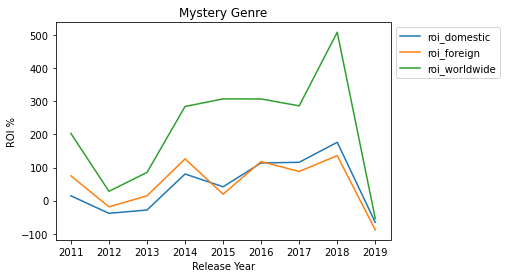

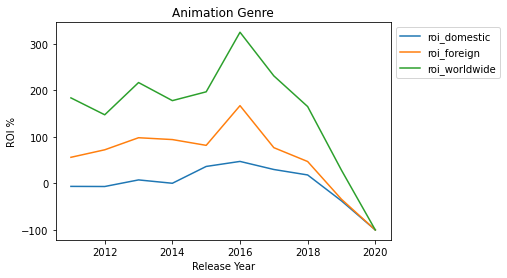

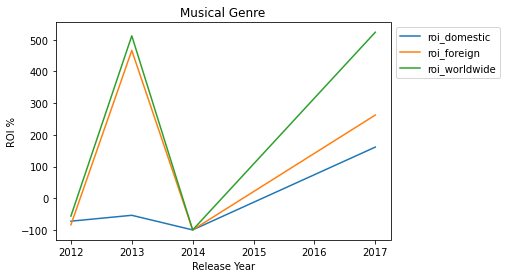

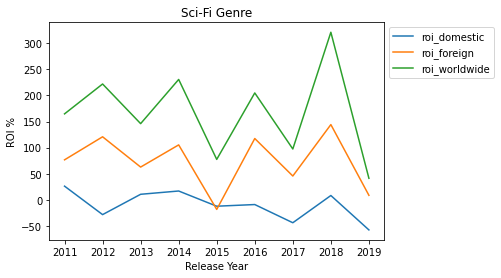

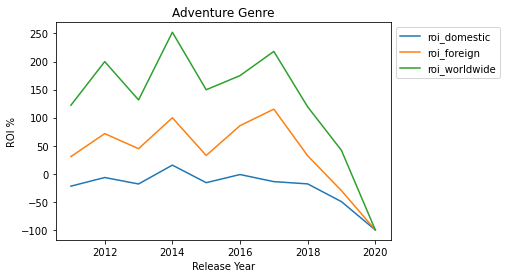

In [41]:
#ATTEMPT TO CREATE A FUNCTION to plot 

def plot_grapher(x, genre):
    plot = x.loc[:,['roi_domestic', 'roi_foreign', 'roi_worldwide']].plot()
    plt.xlabel('Release Year')
    plt.ylabel('ROI %')
    plt.title(genre + ' Genre')
    plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1);
    return plot

plot_grapher(mys2, 'Mystery')

plot_grapher(ani2, 'Animation')

plot_grapher(mus2, 'Musical')

plot_grapher(scifi2, 'Sci-Fi')

plot_grapher(adv2, 'Adventure');

### Business Reccomendation 2:

##### The average ROI for the top 5 genres over the past decade shows that there is a bigger return on investment in the foreign market vs. domestic.
Based on this section of the analysis, Microsoft's movie studios should focus on producing Adventure, Sci-Fi, and Animation movies because of their greater foreign ROI potential.

>Adventure, Sci-Fi, Animation, and Musical movies performed better overseas than they did in the United States. The Mystery Genre's domestic and foreign ROI follow the same general positive trend over time. Each genre's domestic ROI hovers around 0% except for Mystery movies that generally maintains a postive trajectory. There are a few outliers in the musical and mystery genre, but the foreign ROI generally performs better than the domestic ROI. 

### Business Reccomendation 3: Is director choice a characteristic of successful films?

In [ ]:
# Exploring the dataframe
display(df.head(2)), display(df.info()), display(df.isna().sum())

In [ ]:
# Data cleaning
# Dropping unnessary columns for the 3rd question
df.drop(['release_date', 'worldwide_gross', 'foreign_gross', 'domestic_gross'], axis=1, inplace=True)

# Finding the top 10 movies by 'profit'
top10_profit = df.sort_values(by='profit', ascending=False).head(10)
top10_profit = top10_profit.set_index('movie')
top10_profit

In [ ]:
# Stacked bar chart
ax = top10_profit.plot(kind='barh', stacked=True, figsize=(20,12), fontsize=25)

ax.set_xlabel('Profit in USD Billion', fontsize=25, labelpad=20)
ax.set_title('Top 10 Movies by Profit 2010-2020', fontsize=35, pad=30)
ax.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1, fontsize=20);

In [ ]:
print(f'''Directors who appear most often in the 'Top 10 Movies by Profit': 
{top10_profit['director'].value_counts().head(2)}.''')

>No one director appeared more frequently in the 'Top 10 Movies by Profit'. We want to find if there is any correlation between directors' productivity/experience and profit.

In [ ]:
# Creating a new dataframe 'individual_df' with 'director' column expanded to show individaul director per row
#individual_df = df.explode('director')
#individual_df

In [ ]:
# Creating a new dataframe 'individual_df' with 'director' column expanded to show individaul director per row
individual_df = df.explode('director')
individual_df

# Counting movies made by each director
individual_df['director'].value_counts()

# Creating a column that shows the number of movies made by the individual director
individual_df['#movies_by_director'] = individual_df.groupby(['director'])['movie'].transform('count')

# Grouping the dataframe by 'director' and 'movie'
individual_df.groupby(by=['director','movie']).sum()

In [ ]:
# Creating a column that shows the average profit made by the individual director
individual_df['avg_profit'] = individual_df.groupby(['director'])['profit'].transform('mean')
individual_df.groupby(by=['director', 'movie']).sum()

In [ ]:
# Calculating correlation between the number of movies each director made and their average profit(performance)
individual_df.corr()['#movies_by_director'].sort_values()

>There appears to be no correlation between a film's profit and director. In fact, there is no correlation between the director and any of our cost metrics.

In [ ]:
# Scatter plot of the relationship between the number of movies each director made and their average profit
fig, ax = plt.subplots(figsize=(12,7))

ax.scatter(individual_df['#movies_by_director'], 
           individual_df['avg_profit'], 
           alpha=0.3, 
           color='green')
ax.set_title('Number of Movies Made by Director\nvs. Their Average Profit', 
             fontsize=25, 
             pad=20)
ax.set_xlabel('Number of Movies Made by Director', 
              fontsize=20, 
              labelpad=20)
ax.set_ylabel('Average Profit \nin USD Billion', 
              fontsize=20, 
              labelpad=70, 
              rotation=0);
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(16)

In [ ]:
# Finding the succesful directors
#individual_df[(individual_df['#movies_by_director'] > 6)]

### Business Recommendation 3: 

##### From what we see above, there is no correlation between director choice and a film's success.

>Film directors cannot me considered a characteristic of success, because there is no corelation between profits and director choice. Directors with experience directing five or more films do not have a higher profits on average.

## Summary of Findings



After intensive research we've been able to conclude the following information on films produced in the last 10 years:

> 1. The top 5 genres based on average ROI are: adventure, animation, muical, mystery, and sci-fi. From these films we can narrow our genres down to animation and adventure, because they show a consistent return over 0%.
> 2. Films should be released in foreign contries as well as domestically. On average foreign film gross and foreign film ROI are high than domestic. 
> 3. The director of a film is not a characteristic of the success of a film.

More research will need to be done on the characteristics that impact successful films, but from our preliminary research it's clear that the genre choice and the film's reach have a direct impact on success and must be considered when deciding which type of movies we will create.